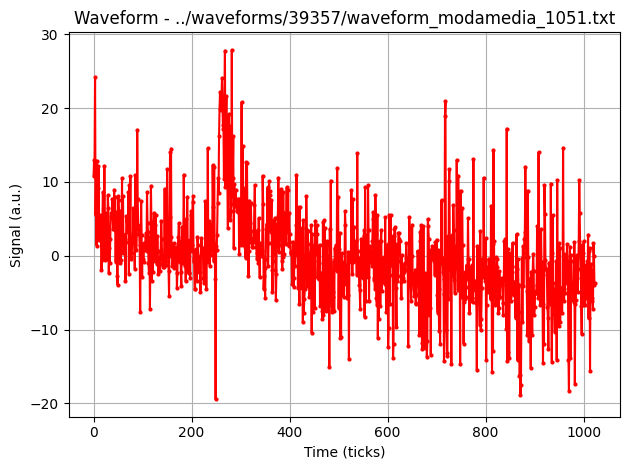

<Figure size 2000x1000 with 0 Axes>

In [539]:
import numpy as np
import matplotlib.pyplot as plt
import os


file_name_2 =  "../waveforms/39357/waveform_modamedia_1051.txt"

data2 = np.loadtxt(file_name_2)

# Separa as colunas
t2 = data2[:, 0]
s2 = data2[:, 1]


# Plota o waveform (opcional)

plt.plot(t2, s2, color='red', marker='o', markersize=2, linestyle='-')
#plt.plot(t3, s3, color='green', marker='o', markersize=2, linestyle='-')
plt.xlabel("Time (ticks)")
plt.ylabel("Signal (a.u.)")
plt.title(f"Waveform - {file_name_2}")
plt.grid(True)

dt = np.diff(t2)
ds = np.diff(s2)
derivada = ds / dt

# Ajusta eixo de tempo da derivada (um ponto a menos)
t_deriv = t2[:-1] + dt / 2

""" plt.plot(t_deriv, derivada, color='red')
plt.title("Derivada Numérica (ds/dt)")
plt.xlabel("Tempo (ticks)")
plt.ylabel("Derivada (a.u./tick)")
plt.grid(True) """

plt.tight_layout()
plt.figure(figsize=(20, 10))   # ← aqui aumenta o tamanho da janela
plt.show()

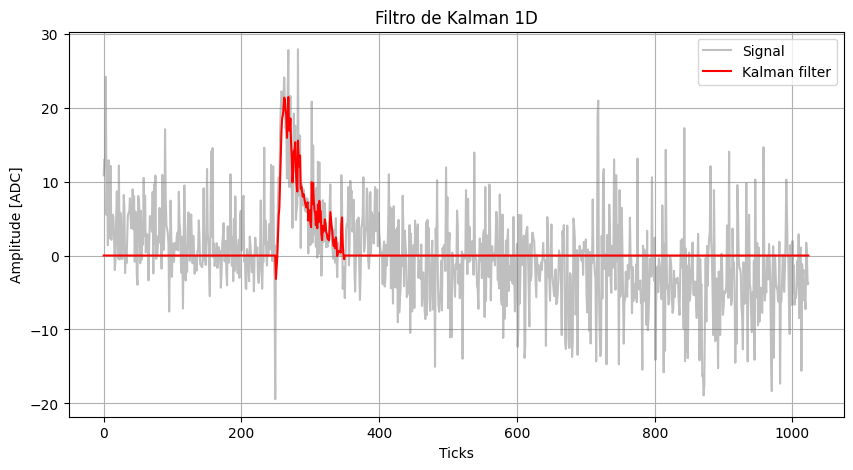

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def kalman_filter(z, Q=1e-5, R=0.1**2):
    """
    z : lista ou array com medições (sinal ruidoso)
    Q : variância do ruído do processo
    R : variância do ruído da medição
    """
    n = len(z)
    x_est = np.zeros(n)  # estimativa do sinal
    P = np.zeros(n)      # incerteza da estimativa

    # inicialização
    x_est[0] = 0
    P[0] = R

    for k in range(1, n):
        # Predição
        x_pred = x_est[k-1]
        P_pred = P[k-1] + Q

        # Atualização
        K = P_pred / (P_pred + R)
        x_est[k] = x_pred + K * (z[k] - x_pred)
        P[k] = (1 - K) * P_pred

    return x_est

# ===== Exemplo =====

pedestal_region = s2[400:]

sigma_noise = np.std(pedestal_region)
R=sigma_noise**2
alpha=0.2
# Filtragem
filtered = kalman_filter(s2, Q=R*alpha, R=sigma_noise**2)


# Plot
plt.figure(figsize=(10,5))
plt.plot(t2, s2, color='gray', alpha=0.5, label='Signal')
plt.plot(t2, filtered, color='red', label='Kalman filter')
plt.legend()
plt.xlabel('Ticks')
plt.ylabel('Amplitude [ADC]')
plt.title('Filtro de Kalman 1D')
plt.grid()
plt.show()



In [541]:
#save waveform
import re
# extrai o número do final do nome
folder = os.path.dirname(file_name_2)
filename = os.path.basename(file_name_2)
match = re.search(r"(\d+)\.txt$", filename)

if not match:
    raise ValueError("Não achei número no filename.")

num = match.group(1)  # ex: "1050"

# novo path
new_path = os.path.join(folder, f"template_{num}.txt")

# salva
np.savetxt(new_path, filtered, fmt="%.6f")
